In [1]:
import numpy as np
%pylab inline
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from glob import glob, iglob
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from itertools import product
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from xgboost import XGBRegressor, XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import RidgeClassifier, RandomizedLasso, Ridge

Populating the interactive namespace from numpy and matplotlib


C:\Program Files\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
data=pd.read_pickle('true_taxi_data.pkl')
data.head()

,r1075,r1076,r1077,r1125,r1126,r1127,r1128,r1129,r1130,r1131,...,s32,c32,s33,c33,s34,c34,s35,c35,week,new_year
2015-06-01 00:00:00,40,32,7,17,60,129,153,271,294,70,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0,0
2015-06-01 01:00:00,17,20,5,13,38,90,111,163,246,28,...,0.930874,0.365341,0.943883,0.330279,0.955573,0.294755,0.965926,0.258819,0,0
2015-06-01 02:00:00,5,5,0,8,25,47,97,139,207,25,...,0.680173,-0.733052,0.623490,-0.781831,0.563320,-0.826239,0.500000,-0.866025,0,0
2015-06-01 03:00:00,5,6,0,6,27,26,68,77,208,29,...,-0.433884,-0.900969,-0.532032,-0.846724,-0.623490,-0.781831,-0.707107,-0.707107,0,0
2015-06-01 04:00:00,8,16,2,6,21,39,53,81,109,8,...,-0.997204,0.074730,-0.974928,0.222521,-0.930874,0.365341,-0.866025,0.500000,0,0


In [15]:
sins=data.columns[102:174]

In [41]:
data=data['2015-01-09 00:00:00':]

In [65]:
data.columns[90:102]

Index([u'r1533', u'r1580', u'r1630', u'r1684', u'r1733', u'r1734', u'r1783',
       u'r2068', u'r2069', u'r2118', u'r2119', u'r2168'],
      dtype='object')

In [67]:
data.to_pickle('data_pred_taxi.pkl')

Загрузим данные

In [265]:
data=pd.read_pickle('data_pred_taxi.pkl')
data.head()

,r1075,r1076,r1077,r1125,r1126,r1127,r1128,r1129,r1130,r1131,...,p1630,p1684,p1733,p1734,p1783,p2068,p2069,p2118,p2119,p2168
2015-06-01 00:00:00,40,32,7,17,60,129,153,271,294,70,...,6.834754,6.904620,3.961101,152.448716,102.071675,65.347774,7.540368,116.667380,28.079413,51.331238
2015-06-01 01:00:00,17,20,5,13,38,90,111,163,246,28,...,9.376189,10.518599,8.335553,591.914713,476.680785,271.767994,23.203243,357.619816,117.544463,152.158198
2015-06-01 02:00:00,5,5,0,8,25,47,97,139,207,25,...,5.127864,10.476913,21.829399,600.038681,513.846111,200.458063,18.973367,193.926681,108.146461,89.339985
2015-06-01 03:00:00,5,6,0,6,27,26,68,77,208,29,...,5.541434,11.090584,10.195935,174.124157,123.519075,46.247334,61.746741,193.021657,84.985269,93.651735
2015-06-01 04:00:00,8,16,2,6,21,39,53,81,109,8,...,13.103516,-1.456841,1.613935,50.201114,-22.364576,6.160092,4.096793,52.433939,-0.699237,100.624092


In [266]:
def lst(x,hr):
    tmp=[0]*(hr)
    for i in range(len(x)-(hr)):
        tmp.append(x[i:i+hr])
    return tmp

Построим новые признаки

In [267]:
total=pd.DataFrame(columns=cls)
for i,n in enumerate(data.columns[:102]):
    print('{} - {}'.format(n,i))
    temp=data[np.append(sins,[n,'p{}'.format(n[1:])])]
    temp['year']=[x.year for x in temp.index]
    temp['month']=[x.month for x in temp.index]
    temp['day']=[x.day for x in temp.index]
    temp['weekday']=[x.weekday() for x in temp.index]
    temp['hour']=[x.hour for x in temp.index]
    
    y=temp[n].values
    temp['y']=y
    temp['pr']=temp['p{}'.format(n[1:])].values
    for k in range(24):
        temp['k{}'.format(k+1)]=np.append(np.zeros(k+1),y)[:-(k+1)]
    for d in range(1,15):
        temp['kd{}'.format(d)]=np.append(np.zeros(d*24),y)[:-(d*24)]
    
    for per in [12,24,168,720]:
        temp['sum{}'.format(per)]=[np.sum(x) for x in lst(y,per)]
    
    for cl in range(6):
        temp['y{}'.format(cl+1)]=np.append(y,np.zeros(cl+1),)[cl+1:]
        
    temp['reg']=n[1:]
    temp.drop([n,'p{}'.format(n[1:])],1, inplace=True)
    total=pd.concat((total,temp))

r1075 - 0


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

r1076 - 1
r1077 - 2
r1125 - 3
r1126 - 4
r1127 - 5
r1128 - 6
r1129 - 7
r1130 - 8
r1131 - 9
r1132 - 10
r1172 - 11
r1173 - 12
r1174 - 13
r1175 - 14
r1176 - 15
r1177 - 16
r1178 - 17
r1179 - 18
r1180 - 19
r1181 - 20
r1182 - 21
r1183 - 22
r1184 - 23
r1221 - 24
r1222 - 25
r1223 - 26
r1224 - 27
r1225 - 28
r1227 - 29
r1228 - 30
r1229 - 31
r1230 - 32
r1231 - 33
r1232 - 34
r1233 - 35
r1234 - 36
r1235 - 37
r1272 - 38
r1273 - 39
r1274 - 40
r1278 - 41
r1279 - 42
r1280 - 43
r1281 - 44
r1282 - 45
r1283 - 46
r1284 - 47
r1285 - 48
r1286 - 49
r1287 - 50
r1326 - 51
r1327 - 52
r1331 - 53
r1332 - 54
r1333 - 55
r1334 - 56
r1335 - 57
r1336 - 58
r1337 - 59
r1338 - 60
r1339 - 61
r1376 - 62
r1377 - 63
r1378 - 64
r1380 - 65
r1382 - 66
r1383 - 67
r1384 - 68
r1385 - 69
r1386 - 70
r1387 - 71
r1388 - 72
r1389 - 73
r1390 - 74
r1426 - 75
r1431 - 76
r1434 - 77
r1435 - 78
r1436 - 79
r1437 - 80
r1438 - 81
r1439 - 82
r1441 - 83
r1442 - 84
r1480 - 85
r1482 - 86
r1483 - 87
r1530 - 88
r1532 - 89
r1533 - 90
r1580 - 91
r1630 - 

In [268]:
total.to_pickle('taxi_features_data.pkl')

In [3]:
total=pd.read_pickle('taxi_features_data.pkl')

In [4]:
train_subset=total[:"2016-04-30 23:00:00"]

In [ ]:
train_subset.drop(['y1','y2','y3','y4','y5','y6',],1,inplace=True)

Сохраним данные

In [134]:
train_subset.to_pickle('train_subset_noy.pkl')

In [271]:
train_subset_may=total["2016-05-01 00:00:00":"2016-05-31 23:00:00"]
test_may=train_subset_may

In [122]:
train_subset_may.to_pickle('train_subset_may.pkl')

In [6]:
train_subset_june=total["2016-05-31 23:00:00":"2016-06-30 17:00:00"]
test_june=train_subset_june

In [74]:
train_subset_june.to_pickle('train_subset_june.pkl')

In [2]:
import pickle
with open('train_y1.pkl','rb') as f:
    train_y1=pickle.load(f)
with open('train_y2.pkl','rb') as f:
    train_y2=pickle.load(f)
with open('train_y3.pkl','rb') as f:
    train_y3=pickle.load(f)
with open('train_y4.pkl','rb') as f:
    train_y4=pickle.load(f)
with open('train_y5.pkl','rb') as f:
    train_y5=pickle.load(f)
with open('train_y6.pkl','rb') as f:
    train_y6=pickle.load(f)

Подберем параметры регрессии. Будем использовать XGBRegressor. Он показал себя лучше всех в сравнении с Lasso и LinearRegressor.

In [ ]:
params = {'n_estimators':[70,100,120],'max_depth':[3,5,7]}

xgb_searcher = GridSearchCV(XGBRegressor(), params,n_jobs=-1)
xgb_searcher.fit(train_subset.values, train_y1)

Лучшие параметры max_depth = 3, n_estimators=70

Обучим 6 моделей. Перед обучением преобразуем категориальный признак региона с помощью one-hot encoder. А также отберем признаки с помощью RandomizedLasso.

In [ ]:
dum1=pd.get_dummies(train_subset.reg)
dum2=pd.get_dummies(test_june.reg)
dum3=pd.get_dummies(test_may.reg)
train_subset=pd.concat((train_subset,dum1),axis=1)
test_june=pd.concat((test_june,dum2),axis=1)
test_may=pd.concat((test_may,dum3),axis=1)
train_subset.drop('reg',1,inplace=True)
test_june.drop('reg',1,inplace=True)
test_may.drop('reg',1,inplace=True)

In [12]:
est=RandomizedLasso()
X_new=est.fit_transform(train_subset.values, train_y1)
est1=XGBRegressor(n_estimators=70,max_depth=3)
est1.fit(X_new, train_y1)

C:\Program Files\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 29 iterations, i.e. alpha=2.172e-03, with an active set of 29 regressors, and the smallest cholesky pivot element being 2.980e-08
  ConvergenceWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 29 iterations, i.e. alpha=2.172e-03, with an active set of 29 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 55 iterations, i.e. alpha=1.086e-03, with an active set of 51 regressors, and the smallest cholesky pivot element being 2.581e-08
  ConvergenceWarning)
C:\Program Files\Anaconda2\lib\

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [249]:
estr1=Ridge()
estr1.fit(X_new, train_y1)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [231]:
estla1=Lasso()
estla1.fit(train_subset.values, train_y1)

C:\Program Files\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [227]:
estl1=LinearRegression()
estl1.fit(train_subset.values, train_y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
with open('est11111.pkl','wb') as f:
    pickle.dump(est1,f)

In [14]:
est2=XGBRegressor(n_estimators=70,max_depth=3)
est2.fit(X_new, train_y2)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [15]:
with open('est22222.pkl','wb') as f:
    pickle.dump(est2,f)

In [16]:
est3=XGBRegressor(n_estimators=70,max_depth=3)
est3.fit(X_new, train_y3)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [17]:
with open('est33333.pkl','wb') as f:
    pickle.dump(est3,f)

In [18]:
est4=XGBRegressor(n_estimators=70,max_depth=3)
est4.fit(X_new, train_y4)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [19]:
with open('est44444.pkl','wb') as f:
    pickle.dump(est4,f)

In [20]:
est5=XGBRegressor(n_estimators=70,max_depth=3)
est5.fit(X_new, train_y5)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [21]:
with open('est55555.pkl','wb') as f:
    pickle.dump(est5,f)

In [22]:
est6=XGBRegressor(n_estimators=70,max_depth=3)
est6.fit(X_new, train_y6)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [23]:
with open('est66666.pkl','wb') as f:
    pickle.dump(est6,f)

In [47]:
train_subset=pd.read_pickle('train_subset_noy.pkl')

Проверим на майских данных

In [140]:
test_may.head()

,c1,c10,c11,c12,c13,c14,c15,c16,c17,c18,...,week,weekday,y,y1,y2,y3,y4,y5,y6,year
2016-05-01 00:00:00,0.623490,-9.009689e-01,-0.900969,-0.222521,0.623490,1.000000e+00,0.623490,-0.222521,-0.900969,-9.009689e-01,...,6.0,6.0,71.0,37.0,10.0,14.0,6.0,8.0,10.0,2016.0
2016-05-01 01:00:00,0.652287,-6.801727e-01,-0.999301,-0.623490,0.185912,8.660254e-01,0.943883,0.365341,-0.467269,-9.749279e-01,...,6.0,6.0,37.0,10.0,14.0,6.0,8.0,10.0,21.0,2016.0
2016-05-01 02:00:00,0.680173,-3.653410e-01,-0.930874,-0.900969,-0.294755,5.000000e-01,0.974928,0.826239,0.149042,-6.234898e-01,...,6.0,6.0,10.0,14.0,6.0,8.0,10.0,21.0,17.0,2016.0
2016-05-01 03:00:00,0.707107,1.936025e-13,-0.707107,-1.000000,-0.707107,1.837038e-13,0.707107,1.000000,0.707107,-1.062628e-13,...,6.0,6.0,14.0,6.0,8.0,10.0,21.0,17.0,23.0,2016.0
2016-05-01 04:00:00,0.733052,3.653410e-01,-0.365341,-0.900969,-0.955573,-5.000000e-01,0.222521,0.826239,0.988831,6.234898e-01,...,6.0,6.0,6.0,8.0,10.0,21.0,17.0,23.0,51.0,2016.0


In [205]:
test_y1=test_may.y1.values
test_y2=test_may.y2.values
test_y3=test_may.y3.values
test_y4=test_may.y4.values
test_y5=test_may.y5.values
test_y6=test_may.y6.values

In [275]:
test_may.drop(['y1','y2','y3','y4','y5','y6',],1,inplace=True)

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [292]:
test_may_new=est.transform(test_may.values)
pr1=est1.predict(test_may_new)
pr2=est2.predict(test_may_new)
pr3=est3.predict(test_may_new)
pr4=est4.predict(test_may_new)
pr5=est5.predict(test_may_new)
pr6=est6.predict(test_may_new)

In [293]:
ans=np.sum(np.abs(test_y1-pr1))+np.sum(np.abs(test_y2-pr2))+np.sum(np.abs(test_y3-pr3))+np.sum(np.abs(test_y4-pr4))+np.sum(np.abs(test_y5-pr5))+np.sum(np.abs(test_y6-pr6))

In [72]:
float(ans)/102/739/6

35.34510559349273

In [226]:
float(ans)/102/739/6

35.39898346024841

In [260]:
float(ans)/102/739/6

36.21126997904262

In [294]:
float(ans)/102/739/6

27.89353215816037

Результат почти такой же, какой и был в SARIMAX. Увеличение числа признаков улучшает результат. Я взял  24 и 15 новых признаков соответственно. Дальше увеличивать их кол-во не стал.

In [262]:
cls=[u'c1', u'c10', u'c11', u'c12', u'c13', u'c14', u'c15', u'c16',
       u'c17', u'c18', u'c19', u'c2', u'c20', u'c21', u'c22', u'c23',
       u'c24', u'c25', u'c26', u'c27', u'c28', u'c29', u'c3', u'c30',
       u'c31', u'c32', u'c33', u'c34', u'c35', u'c4', u'c5', u'c6', u'c7',
       u'c8', u'c9', u'day', u'hour', u'k1', u'k2', u'k3', u'k4', u'k5',
       u'k6', u'kd1', u'kd2', u'month', u'new_year', u'reg', u's1',
       u's10', u's11', u's12', u's13', u's14', u's15', u's16', u's17',
       u's18', u's19', u's2', u's20', u's21', u's22', u's23', u's24',
       u's25', u's26', u's27', u's28', u's29', u's3', u's30', u's31',
       u's32', u's33', u's34', u's35', u's4', u's5', u's6', u's7', u's8',
       u's9', u'sum12', u'sum168', u'sum24', u'sum720', u'week',
       u'weekday', u'y1', u'y2', u'y3', u'y4', u'y5', u'y6', u'year','y','pr']

In [263]:
sins=[u'c1', u'c10', u'c11', u'c12', u'c13', u'c14', u'c15', u'c16',
       u'c17', u'c18', u'c19', u'c2', u'c20', u'c21', u'c22', u'c23',
       u'c24', u'c25', u'c26', u'c27', u'c28', u'c29', u'c3', u'c30',
       u'c31', u'c32', u'c33', u'c34', u'c35', u'c4', u'c5', u'c6', u'c7',
       u'c8', u'c9', u'new_year', u's1',
       u's10', u's11', u's12', u's13', u's14', u's15', u's16', u's17',
       u's18', u's19', u's2', u's20', u's21', u's22', u's23', u's24',
       u's25', u's26', u's27', u's28', u's29', u's3', u's30', u's31',
       u's32', u's33', u's34', u's35', u's4', u's5', u's6', u's7', u's8',
       u's9', u'week']

График с предсказанными значениями и с исходными для сравнения.

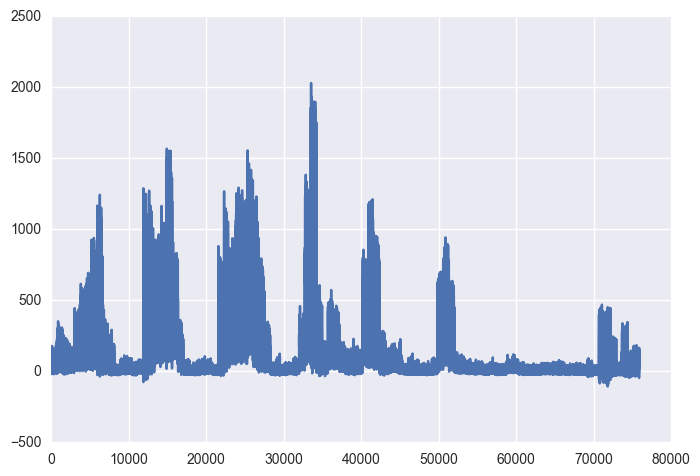

In [230]:
plt.plot(prla1)

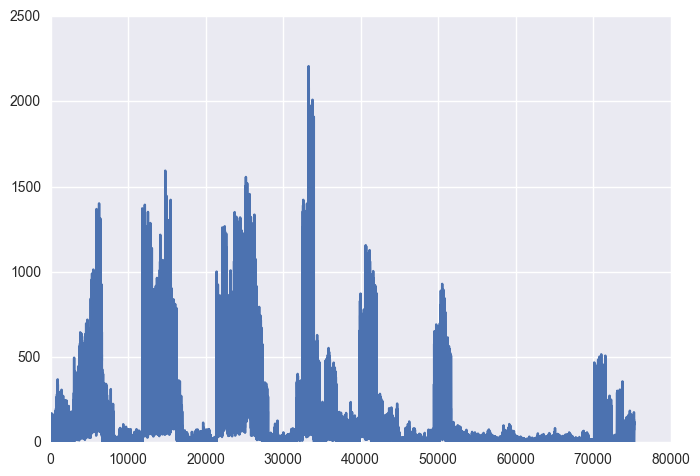

In [73]:
plt.plot(test_y2)

Спрогнозируем июнь

In [96]:
test_y1=test_june.y1.values
test_y2=test_june.y2.values
test_y3=test_june.y3.values
test_y4=test_june.y4.values
test_y5=test_june.y5.values
test_y6=test_june.y6.values

In [8]:
test_june.drop(['y1','y2','y3','y4','y5','y6',],1,inplace=True)

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
test_june_new=est.transform(test_june.values)
pr1=est1.predict(test_june_new)
pr2=est2.predict(test_june_new)
pr3=est3.predict(test_june_new)
pr4=est4.predict(test_june_new)
pr5=est5.predict(test_june_new)
pr6=est6.predict(test_june_new)

In [25]:
test_june=train_subset_june

In [26]:
def get_ans(x):
    return x['reg']+'_'+str(x['date'].date())+'_'+str((x['date'].hour))

In [27]:
test_june['date']=test_june.index

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
test_june['ans']=test_june.apply(get_ans,axis=1)

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
date=test_june['ans'].values

In [30]:
ans=pd.DataFrame(columns=['id','y'])

In [31]:
date1=[x+'_1' for x in date]
date2=[x+'_2' for x in date]
date3=[x+'_3' for x in date]
date4=[x+'_4' for x in date]
date5=[x+'_5' for x in date]
date6=[x+'_6' for x in date]

In [32]:
ans1=pd.DataFrame(zip(date1,pr1),columns=['id','y'])
ans2=pd.DataFrame(zip(date2,pr2),columns=['id','y'])
ans3=pd.DataFrame(zip(date3,pr3),columns=['id','y'])
ans4=pd.DataFrame(zip(date4,pr4),columns=['id','y'])
ans5=pd.DataFrame(zip(date5,pr5),columns=['id','y'])
ans6=pd.DataFrame(zip(date6,pr6),columns=['id','y'])

In [ ]:
ans=pd.concat((ans,ans1),axis=0)
ans=pd.concat((ans,ans2),axis=0)
ans=pd.concat((ans,ans3),axis=0)
ans=pd.concat((ans,ans4),axis=0)
ans=pd.concat((ans,ans5),axis=0)
ans=pd.concat((ans,ans6),axis=0)

In [34]:
ans.head()

,id,y
0,1075_2016-05-31_23_1,20.656727
1,1075_2016-06-01_0_1,15.432981
2,1075_2016-06-01_1_1,9.585618
3,1075_2016-06-01_2_1,6.487360
4,1075_2016-06-01_3_1,6.534386


In [35]:
ans.to_csv('taxi222.csv',index=False)

Результат получился почти такой же как и на прошлой неделе при использовании SARIMAX. - 26.12452 против 24.35303.
Можно было бы еще увеличивать кол-во признаков, но я подожду следующей недели.